In [21]:
import numpy as np
from numpy import absolute
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA


In [23]:
def scale_raw_data(raw_data: pd.DataFrame):
    # to work on copy of the data
    df_scaled = raw_data.copy()

    # Scaling the data to keep the different attributes in same range.
    df_scaled[df_scaled.columns] = StandardScaler().fit_transform(df_scaled)

    return df_scaled

In [80]:
features_and_votes = pd.read_csv('features_and_votes.csv')

In [81]:
features_and_votes

,spectrogram_id,eeg_id,seizure_vote_prob,lpd_vote_prob,gpd_vote_prob,lrda_vote_prob,grda_vote_prob,other_vote_prob,Fp1_outliers,F3_outliers,...,LP_outliers,RP_outliers,LL_stdev,RL_stdev,LP_stdev,RP_stdev,LL_max_to_mean,RL_max_to_mean,LP_max_to_mean,RP_max_to_mean
0,789577333,568657,0.0,0.000000,0.25,0.000000,0.166667,0.583333,0,1,...,8,9,70.490915,269.568082,59.196740,836.370758,18.200699,58.739120,10.183651,113.864825
1,1552638400,582999,0.0,0.857143,0.00,0.071429,0.000000,0.071429,4,0,...,0,0,2.949123,1.416513,2.346329,1.555109,4.403127,1.950837,2.642916,1.273860
2,14960202,642382,0.0,0.000000,0.00,0.000000,0.000000,1.000000,2,2,...,46,102,2.764607,2.571538,6.297570,54010.614702,25.026925,15.206804,54.807401,6265.603329
3,618728447,751790,0.0,0.000000,1.00,0.000000,0.000000,0.000000,0,0,...,0,16,3.345437,1.886889,2.177290,1.500144,0.547013,0.414187,0.607942,0.462039
4,52296320,778705,0.0,0.000000,0.00,0.000000,0.000000,1.000000,0,2,...,27,42,6.605577,51.467309,6.424799,30700.268315,14.786883,58.029618,10.706729,17880.204075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084,1188113564,4293354003,0.0,0.000000,0.00,0.000000,0.500000,0.500000,1,3,...,4,6,0.470028,0.392418,0.425357,0.372764,0.724180,0.630275,0.877657,0.859612
17085,1549502620,4293843368,0.0,0.000000,0.00,0.000000,0.500000,0.500000,3,1,...,12,6,2.415877,2.654536,1.407534,1.871818,3.258166,5.318108,3.898929,5.905336
17086,2105480289,4294455489,0.0,0.000000,0.00,0.000000,0.000000,1.000000,0,0,...,0,0,631.260509,6196.362633,530.339209,2308.833320,13.536479,2.127026,15.434430,1.370911
17087,657299228,4294858825,0.0,0.000000,0.00,0.000000,0.066667,0.933333,8,8,...,16,24,42430.671949,12970.578039,147974.555753,14204.393170,14251.183725,105844.744343,999.296578,129599.940942


In [95]:
features_and_votes = features_and_votes.dropna()
features_and_votes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_and_votes = features_and_votes.dropna()


/var/folders/sm/chl5mzm52_z51h2y0x9sf2yw0000gp/T/ipykernel_16252/1101931741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_and_votes.replace([np.inf, -np.inf], np.nan, inplace=True)


In [96]:
features_and_votes

,spectrogram_id,eeg_id,seizure_vote_prob,lpd_vote_prob,gpd_vote_prob,lrda_vote_prob,grda_vote_prob,other_vote_prob,Fp1_outliers,F3_outliers,...,LP_outliers,RP_outliers,LL_stdev,RL_stdev,LP_stdev,RP_stdev,LL_max_to_mean,RL_max_to_mean,LP_max_to_mean,RP_max_to_mean
0,789577333,568657,0.0,0.000000,0.25,0.000000,0.166667,0.583333,0,1,...,8,9,70.490915,269.568082,59.196740,836.370758,18.200699,58.739120,10.183651,113.864825
1,1552638400,582999,0.0,0.857143,0.00,0.071429,0.000000,0.071429,4,0,...,0,0,2.949123,1.416513,2.346329,1.555109,4.403127,1.950837,2.642916,1.273860
2,14960202,642382,0.0,0.000000,0.00,0.000000,0.000000,1.000000,2,2,...,46,102,2.764607,2.571538,6.297570,54010.614702,25.026925,15.206804,54.807401,6265.603329
3,618728447,751790,0.0,0.000000,1.00,0.000000,0.000000,0.000000,0,0,...,0,16,3.345437,1.886889,2.177290,1.500144,0.547013,0.414187,0.607942,0.462039
4,52296320,778705,0.0,0.000000,0.00,0.000000,0.000000,1.000000,0,2,...,27,42,6.605577,51.467309,6.424799,30700.268315,14.786883,58.029618,10.706729,17880.204075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17083,819682076,4293306306,0.0,0.066667,0.40,0.000000,0.133333,0.400000,0,2,...,17,25,3.100835,4.992311,2.900941,29.687979,0.284139,1.181963,0.294451,19.129620
17084,1188113564,4293354003,0.0,0.000000,0.00,0.000000,0.500000,0.500000,1,3,...,4,6,0.470028,0.392418,0.425357,0.372764,0.724180,0.630275,0.877657,0.859612
17085,1549502620,4293843368,0.0,0.000000,0.00,0.000000,0.500000,0.500000,3,1,...,12,6,2.415877,2.654536,1.407534,1.871818,3.258166,5.318108,3.898929,5.905336
17087,657299228,4294858825,0.0,0.000000,0.00,0.000000,0.066667,0.933333,8,8,...,16,24,42430.671949,12970.578039,147974.555753,14204.393170,14251.183725,105844.744343,999.296578,129599.940942


In [106]:
X = features_and_votes.drop(columns=['spectrogram_id', 'eeg_id', 'seizure_vote_prob', 'lpd_vote_prob', 'gpd_vote_prob',
                                        'lrda_vote_prob', 'grda_vote_prob', 'other_vote_prob'])
y = features_and_votes[['seizure_vote_prob', 'lpd_vote_prob', 'gpd_vote_prob',
                                        'lrda_vote_prob', 'grda_vote_prob', 'other_vote_prob']]

In [107]:
X.sort_values('EKG_max_to_mean')['EKG_max_to_mean']

16499    -75036.672449
11981    -47601.536861
14700    -23862.224737
8686     -17939.499882
12731    -17668.968193
             ...      
2461      19634.462008
12413     32510.408658
13945     48550.809928
8644      68254.433354
1788     210554.323943
Name: EKG_max_to_mean, Length: 16937, dtype: float64

In [108]:
X_scaled = scale_raw_data(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


# define model
model = RandomForestRegressor()

# fit model
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

# relabel predictions columns
predictions_clean = pd.DataFrame(predictions)
    
  

In [111]:
predictions_clean['sum'] = predictions_clean.sum(axis=1)

In [119]:
predictions_clean=predictions_clean.rename(columns={0:'seizure_vote_prob', 1:'lpd_vote_prob', 2:'gpd_vote_prob',
                                        3:'lrda_vote_prob', 4:'grda_vote_prob', 5:'other_vote_prob'}).drop(columns={'sum'})

In [120]:
predictions_clean.idxmax(axis="columns")

0          grda_vote_prob
1         other_vote_prob
2         other_vote_prob
3         other_vote_prob
4         other_vote_prob
              ...        
5077      other_vote_prob
5078        lpd_vote_prob
5079      other_vote_prob
5080      other_vote_prob
5081    seizure_vote_prob
Length: 5082, dtype: object

In [115]:
y_test.idxmax(axis="columns")

7887        grda_vote_prob
4538       other_vote_prob
1913        lrda_vote_prob
7380       other_vote_prob
9490       other_vote_prob
               ...        
3654        grda_vote_prob
14223        lpd_vote_prob
8184     seizure_vote_prob
5453        grda_vote_prob
2946         gpd_vote_prob
Length: 5082, dtype: object

In [152]:
y_pred = pd.DataFrame(pd.DataFrame(predictions_clean.idxmax(axis="columns")).reset_index().rename(columns = {0:'vote'}).groupby('vote').size().reset_index().rename(columns= {0:'count'}))


In [153]:
y_test = pd.DataFrame(pd.DataFrame(y_test.idxmax(axis="columns")).reset_index().rename(columns={0:'vote'}).groupby('vote').size()).reset_index().rename(columns= {0:'count'})

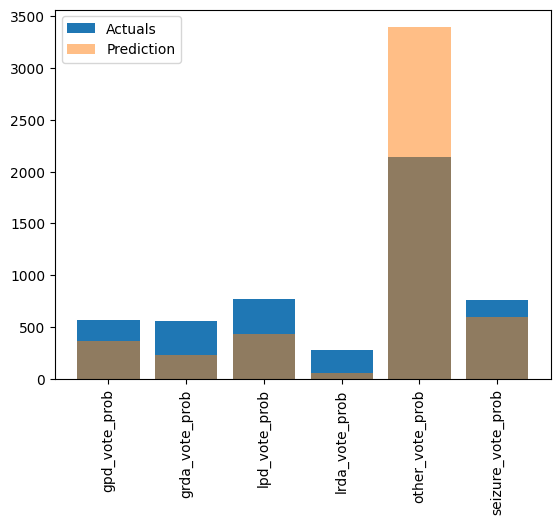

In [159]:
plt.bar(y_test['vote'], y_test['count'], label = 'Actuals')
plt.bar(y_pred['vote'], y_pred['count'], label = 'Prediction', alpha = 0.5)
plt.legend()
plt.xticks(rotation = 90)
plt.show()
